#Clustering Analysis : Online Retail Case Study

##Installing necessary libraries

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.figure_factory as ff   # plotly is a powerful library for creating interactive visualizations. figure_factory specifically provides functions for creating complex chart types easily.
import matplotlib.pyplot as plt   #for visualization
from pandas.plotting import scatter_matrix   #useful for visualizing relationships between multiple numerical variables in a dataset.
from sklearn.preprocessing import MinMaxScaler   #used for feature scaling
import seaborn as sns   #high level(built on top of matplotlib)
import missingno as msno   #used for visualizing missing data within a dataset
from matplotlib import rcParams   # rcParams allows customization of various default settings in matplotlib
from mpl_toolkits.mplot3d import Axes3D   # used to create 3-dimensional plots within matplotlib.
from yellowbrick.cluster import KElbowVisualizer   #yellowbrick is an extension of scikit-learn that provides visualizers for machine learning models. KElbowVisualizer helps determine the optimal number of clusters for K-Means clustering using the Elbow method.
from sklearn.cluster import KMeans   #clusters based on similarity.
from sklearn.cluster import AgglomerativeClustering   #clustering algorithm that builds a hierarchy of clusters by iteratively merging or splitting them.
from sklearn.mixture import GaussianMixture   #used for probabilistic clustering and assumes that the data is generated from a mixture of Gaussian distributions.

# KERNEL'S AGENDA:
## I. UNDERSTANDING THE DATA:
    1. Data Overview
    2. Data Cleaning
## II. RFM (Recency Frequency Monetary) ANALYSIS:
    1. Calculating Monetary Value
    2. Calculating Frequency
    3. Calculating Recency
    4. Creating RFM dataset
## III. EDA ANALYSIS (EXPLORATORY DATA ANALYSIS):
    1. Remove Outlier
    2. Data Visualization
    3. Scale the data
## IV. CLUSTERING MODELS:
    1. K-means Clusters: Elbow Method
    2. K-means Clusters: Silhouette Method
    3. Hierarchical Agglomerative Clustering
## V. CLUSTER PROFILE:
    1. K-means Cluster: 3 Clusters
    2. Hierarchical Agglomerative Clustering: 2 Clusters
    3. Gaussian Mixture Model: 3 Clusters
## VI. CONCLUSION


#Understanding data
##1.Data overview

In [10]:
# import the data:
df = pd.read_csv("data.csv", delimiter=',', encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo, StockCode, Description, InvoiceDate and Country are Non-numeric Variables

Quantity, UnitPrice and CustomerID are numeric Variables

--> Let's see what non-numeric variables and numeric variables differ in the description

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Highlights:
* There are some missing values at CustomerID
* Quantity and UnitPrice suppose to be the positive value, however they receive the negative value as min value. Those negative values should be removed

In [18]:
df.describe(exclude=['float64','int64']).T  #for non numeric features

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


- There are some missing data at 'Description" feature (540455 is the count not 541909)
- Unitied Kingdom domains the distribution of country feature( 495478 out of 541909)


##2. Data Cleaning

###Dropping null values

total number of observations are: 406829


<Axes: >

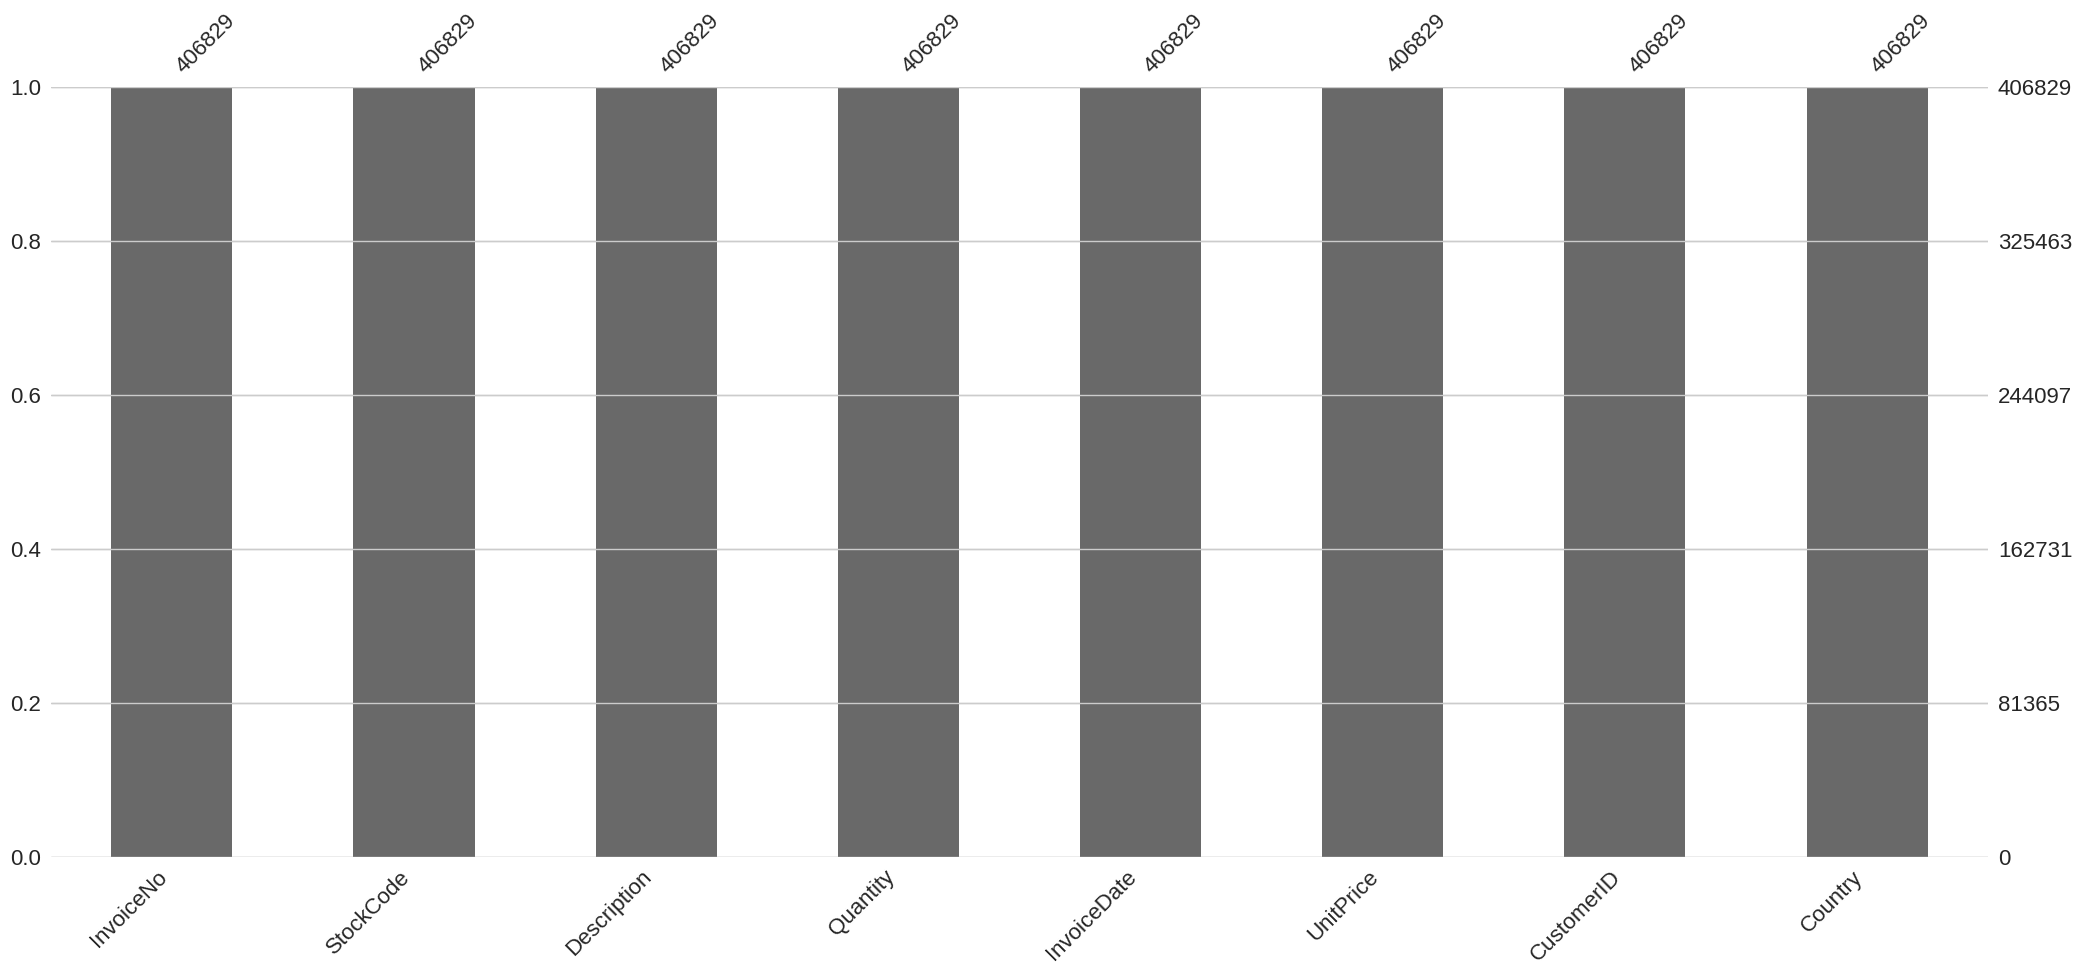

In [26]:
print('total number of observations are:',df.shape[0])
msno.bar(df)
#checking null values

In [27]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [28]:
# removing rows with null values(because the dataset is huge..not a problem)
df.dropna(inplace=True)

<Axes: >

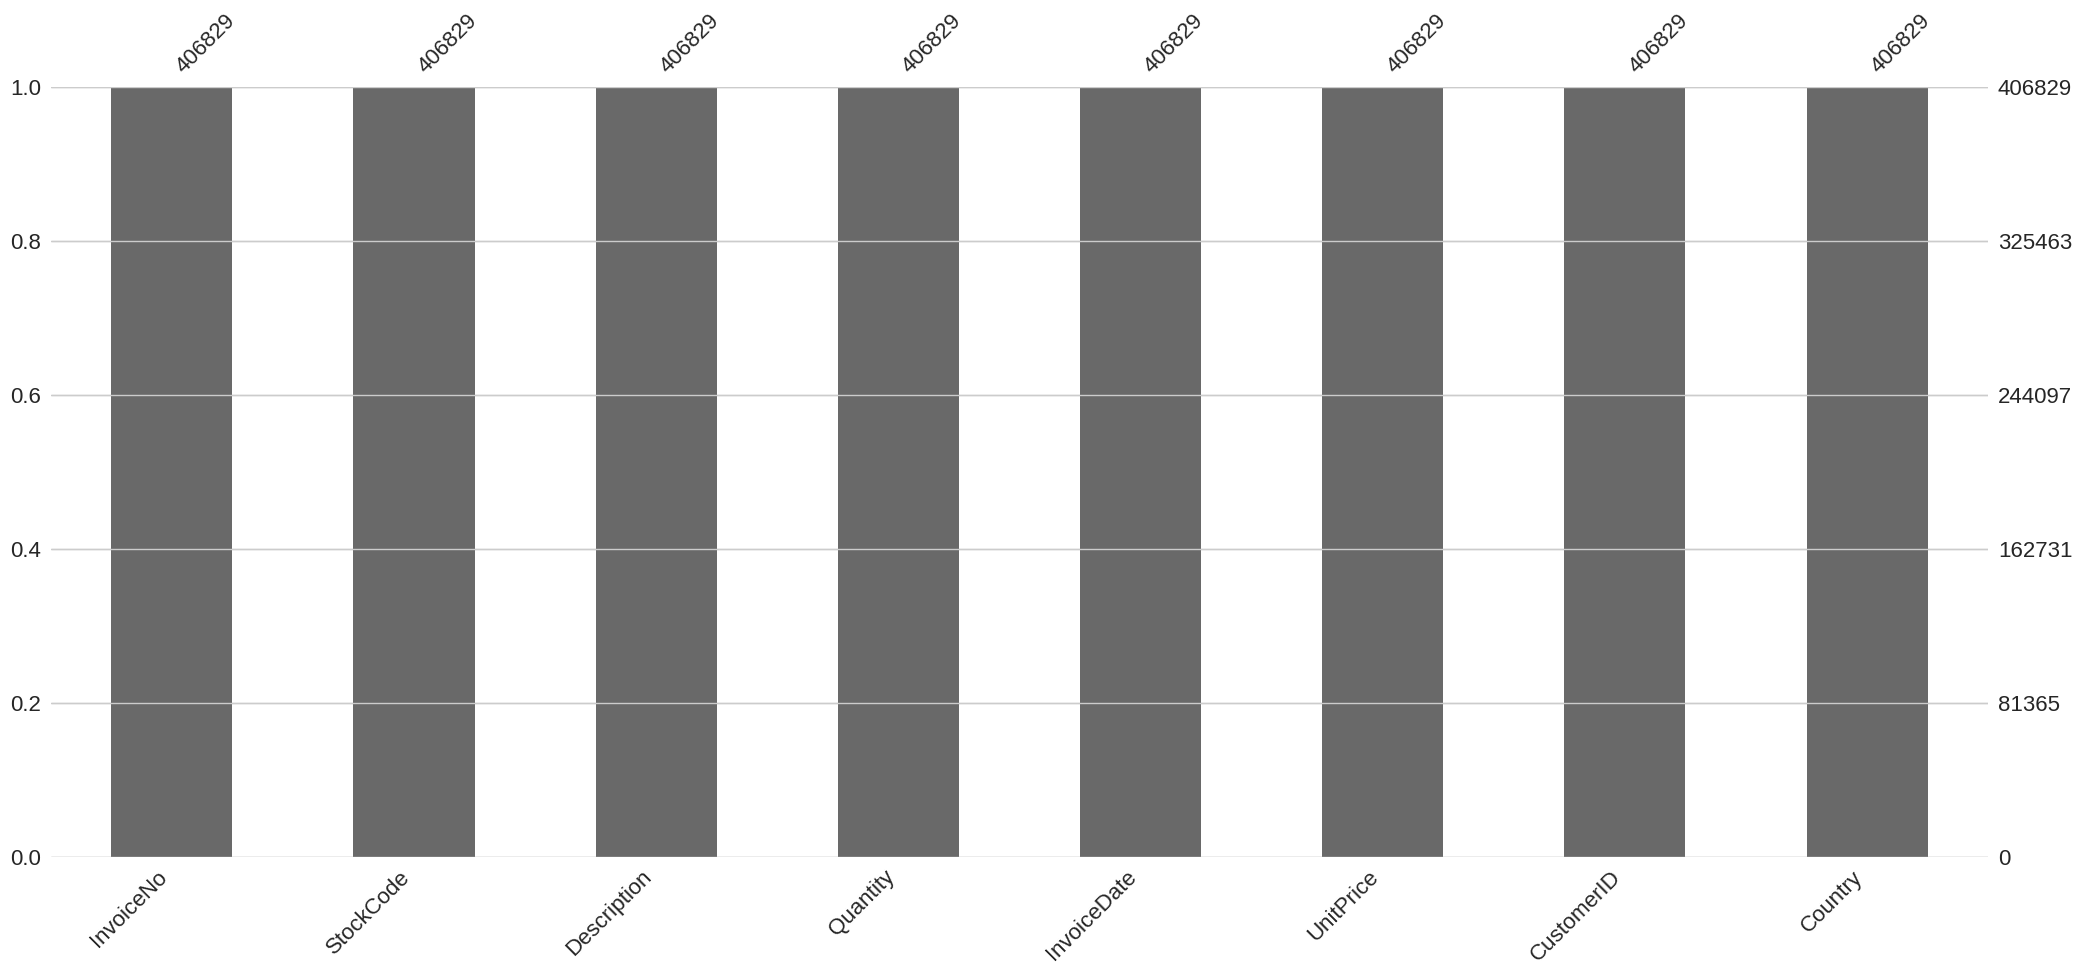

In [29]:
msno.bar(df)

In [30]:
###Dropping negative values

In [31]:
# drop the negative value out
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)

In [32]:
#check whether are there any negative value:
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0]

(0, 0)

### Now the data is clean and ready to be used in the model!


##II. RFM Analysis

We are going to analysis the Customers based on below 4 factors:

- Total amount a customer spent: Amount = Quantity * UnitPrice
- Number of transaction: Number of InvoiceNo by Customer
- Last transaction: the days since last transaction
- Country: country where customer made the transaction

###1.Calculating Monetary Value (Total Amount):

In [36]:
df['TotalAmt']=df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['TotalAmt'].sum().reset_index()
tm.head()

,CustomerID,TotalAmt
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


###2.Calculating Frequency (Invoice)

In [37]:
#number transaction
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


###3.Calculating Recency(last transaction)

In [40]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
lt=df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


###4.Creating RFM dataset

In [41]:
merged=pd.merge(lt,nt,how='inner',on='CustomerID')
new_df=pd.merge(merged,tm,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmt
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


In [42]:
##III. EDAV

###1. Remove outliers

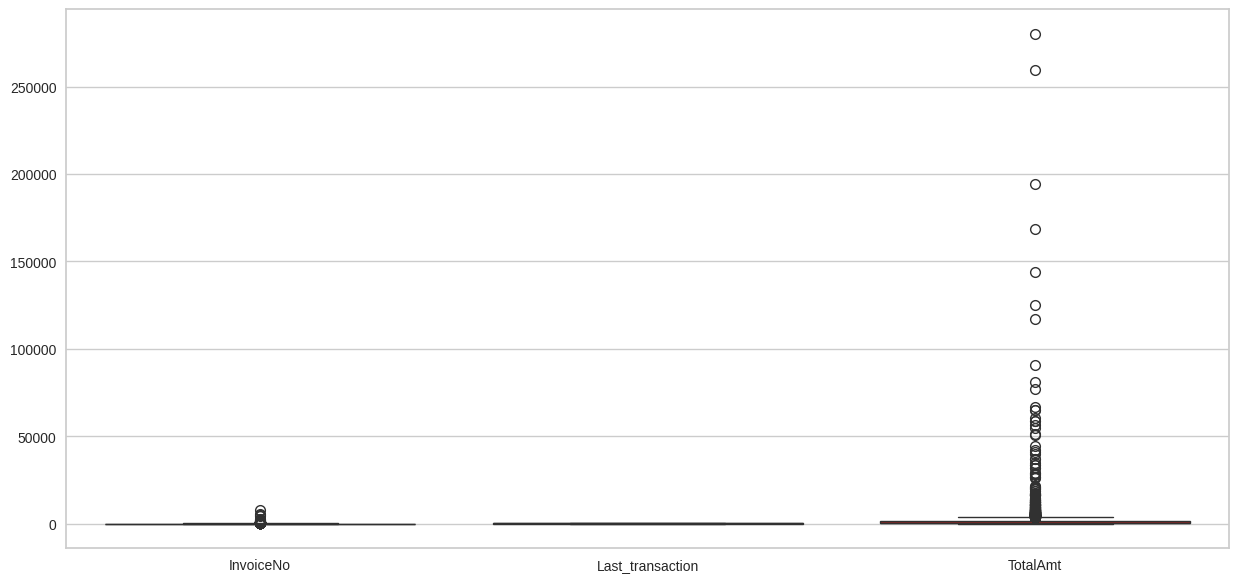

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','TotalAmt']])
plt.show()

There are several method to remove outlier such as IQR method, Z-score Method, Standard Deviation Method.
I use IQR method to remove outliers.

In [49]:
#there are many outliers in total amount feature, let's drop them
IQR=new_df['TotalAmt'].quantile(0.75)-new_df['TotalAmt'].quantile(0.25)
lower_limit=new_df['TotalAmt'].quantile(0.25)-(IQR*1.5)
upper_limit=new_df['TotalAmt'].quantile(0.75)+(IQR*1.5)
df_iqr=new_df[(new_df['TotalAmt']>=lower_limit) & (new_df['TotalAmt']<=upper_limit)]
print("Data shape before removal of outliers:",new_df.shape)
print("Data shape after removal of outliers:",df_iqr.shape)
print('Total number of outliers:',len(new_df[(new_df['TotalAmt']<lower_limit) | (new_df['TotalAmt']>upper_limit)]))

Data shape before removal of outliers: (4347, 5)
Data shape after removal of outliers: (3923, 5)
Total number of outliers: 424


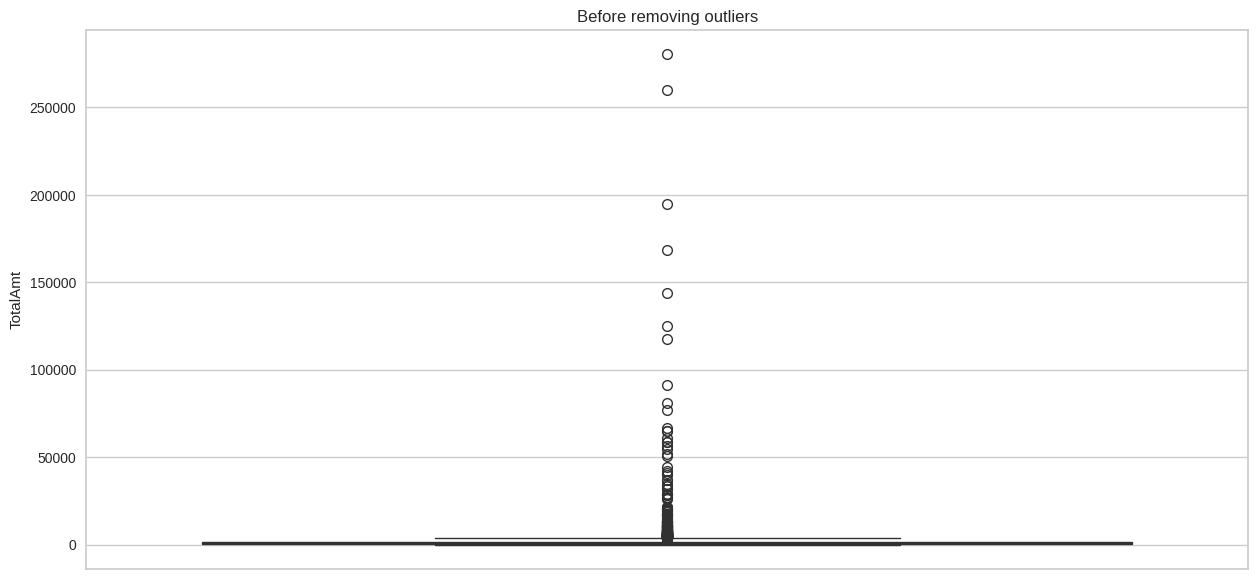

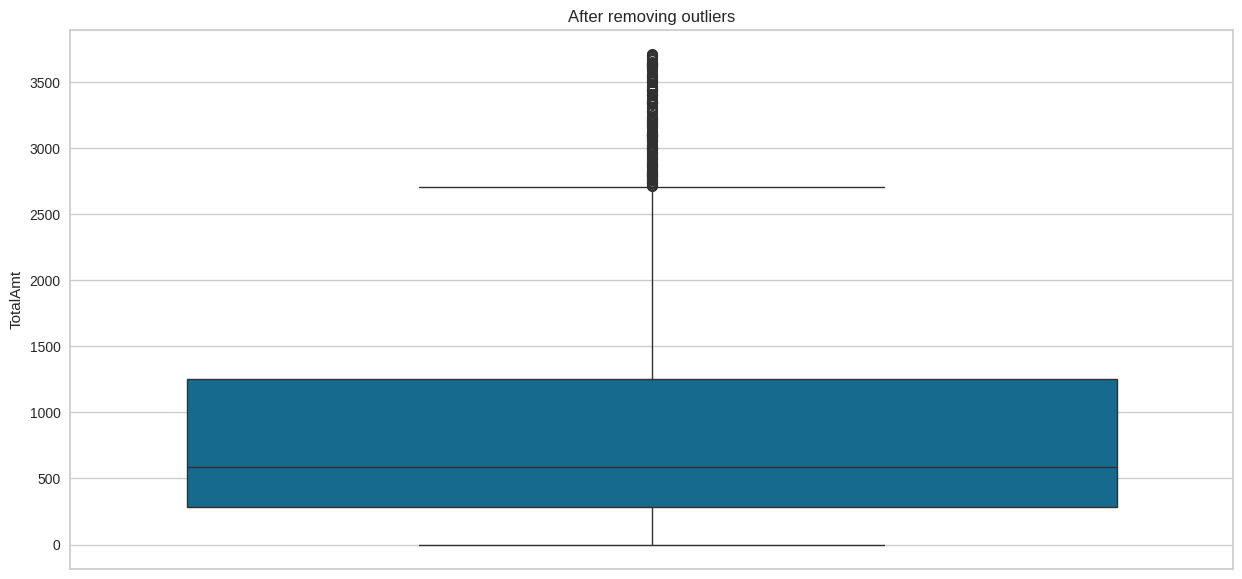

In [50]:
#box plot to show difference before and after removing outliers
plt.figure(figsize=(15,7))
sns.boxplot(new_df['TotalAmt'])
plt.title("Before removing outliers")
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['TotalAmt'])
plt.title("After removing outliers")
plt.show()

In [51]:
df_iqr.reset_index(drop=True,inplace=True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmt
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


###2.Data Visualization

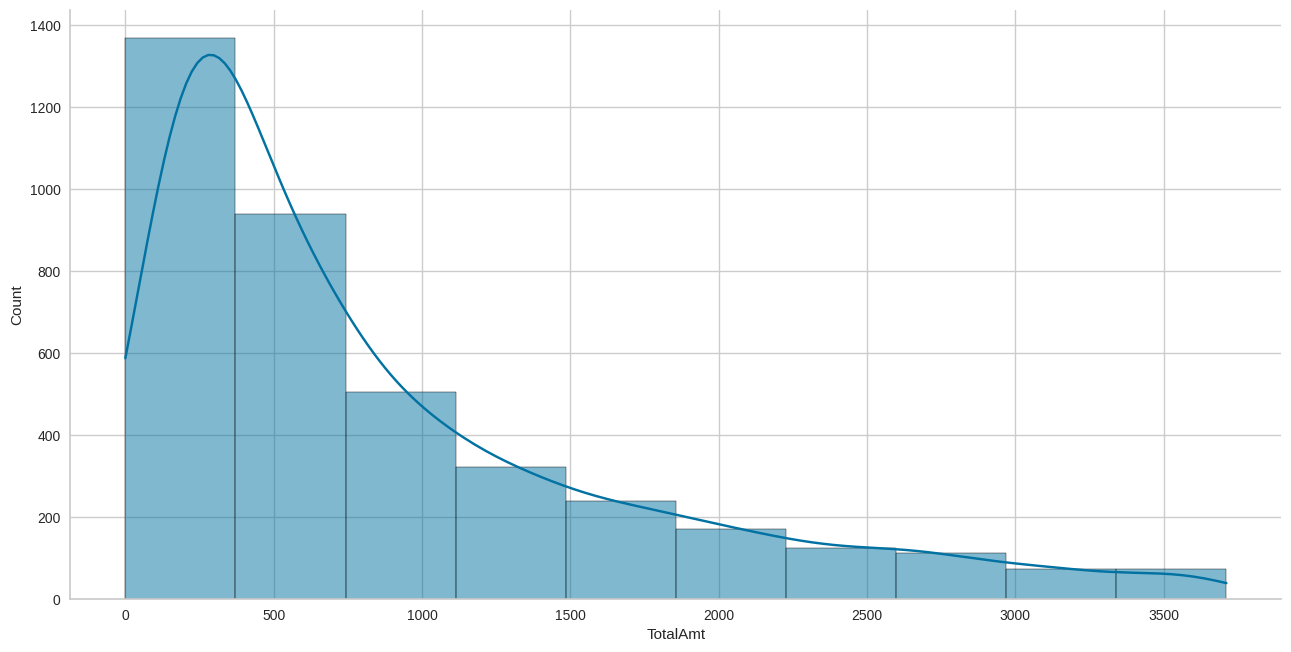

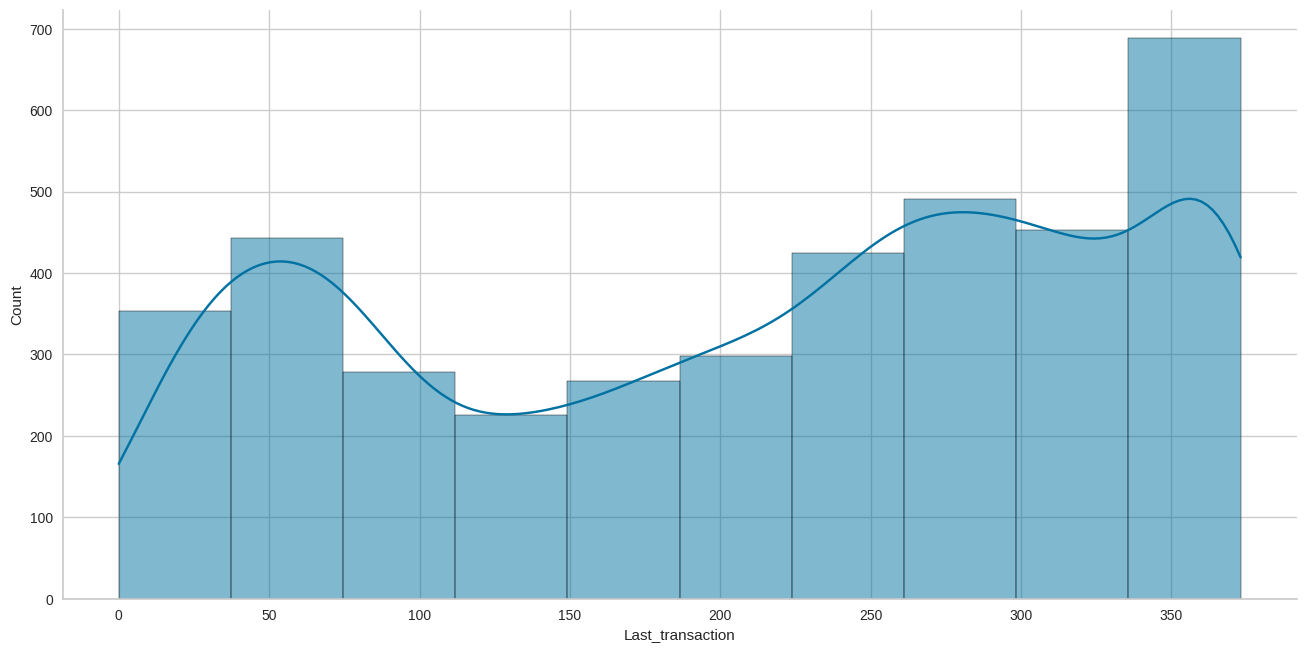

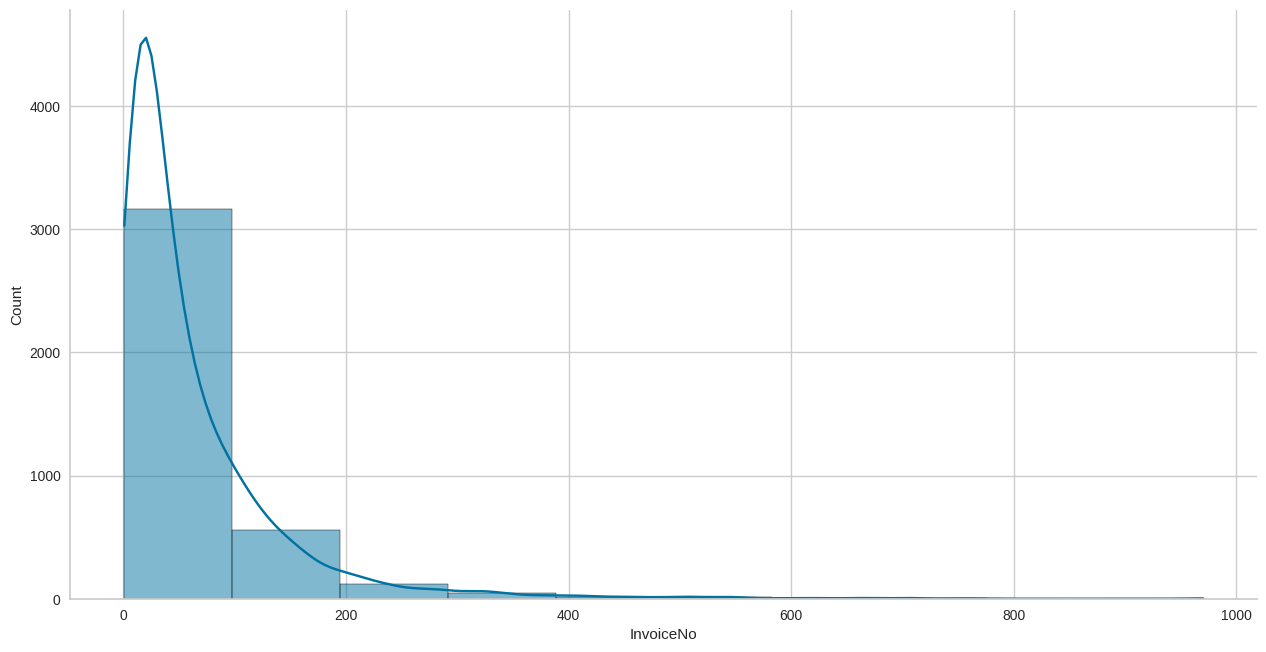

In [52]:
#Histogram plot
new1_df=df_iqr.copy()
df_nums=['TotalAmt','Last_transaction','InvoiceNo']
for i in df_nums:
  sns.displot(new1_df[i],bins=10,kde=True)
  plt.gcf().set_size_inches(15,7)
  plt.show()

Total Amount (Monetary) and InvoiceNo (Frequency) histogram are right-skewed

Last_Transaction (Recency) histogram is bimodal


####Country groupby visualization

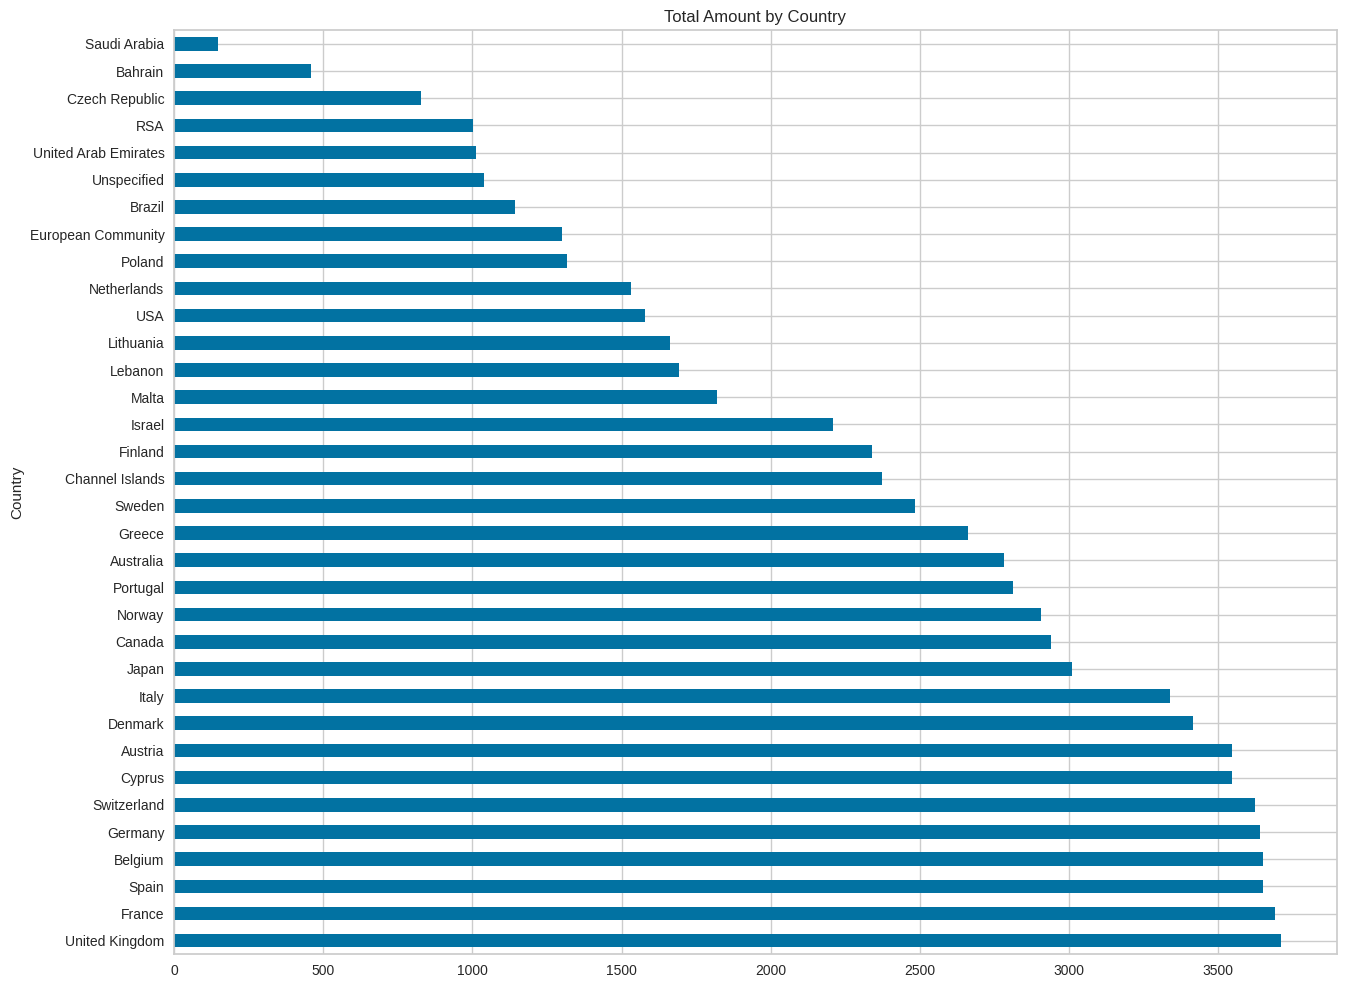

In [55]:
#group by maxm total amt
plt.figure(figsize=(15,12))
new1_df.groupby("Country").TotalAmt.max().sort_values(ascending=False).plot.barh()
plt.title("Total Amount by Country")
plt.show()

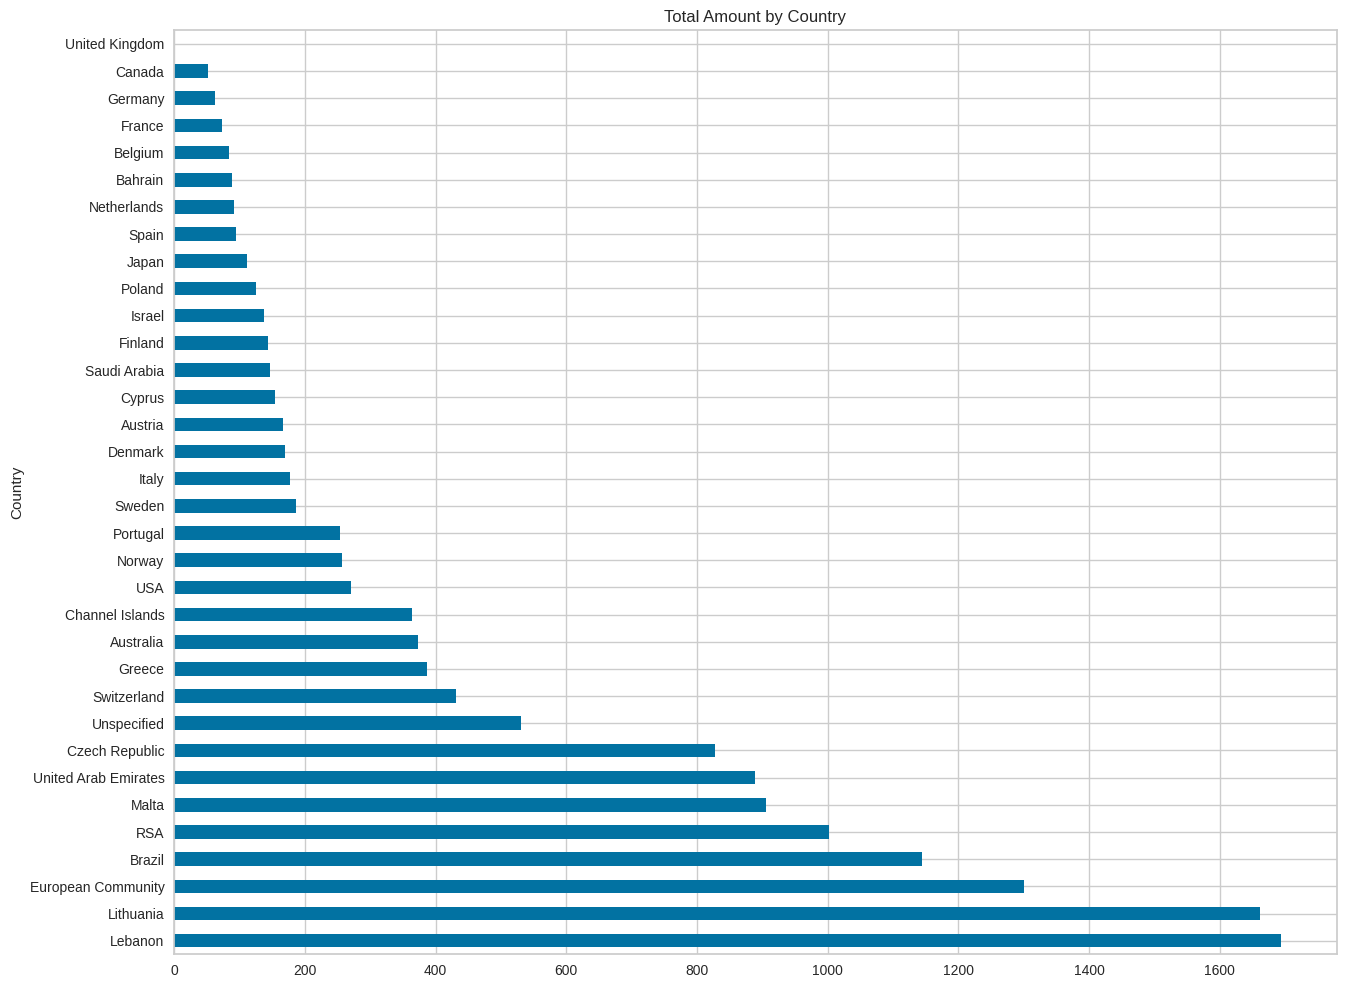

In [56]:
#group by minm total amount
plt.figure(figsize=(15,12))
new1_df.groupby('Country').TotalAmt.min().sort_values(ascending=False).plot.barh()
plt.title("Total Amount by Country")
plt.show()


As expected, Unitied Kingdom Spend the maximum Amount.

Lebanon is the country spend has least money for shopping.

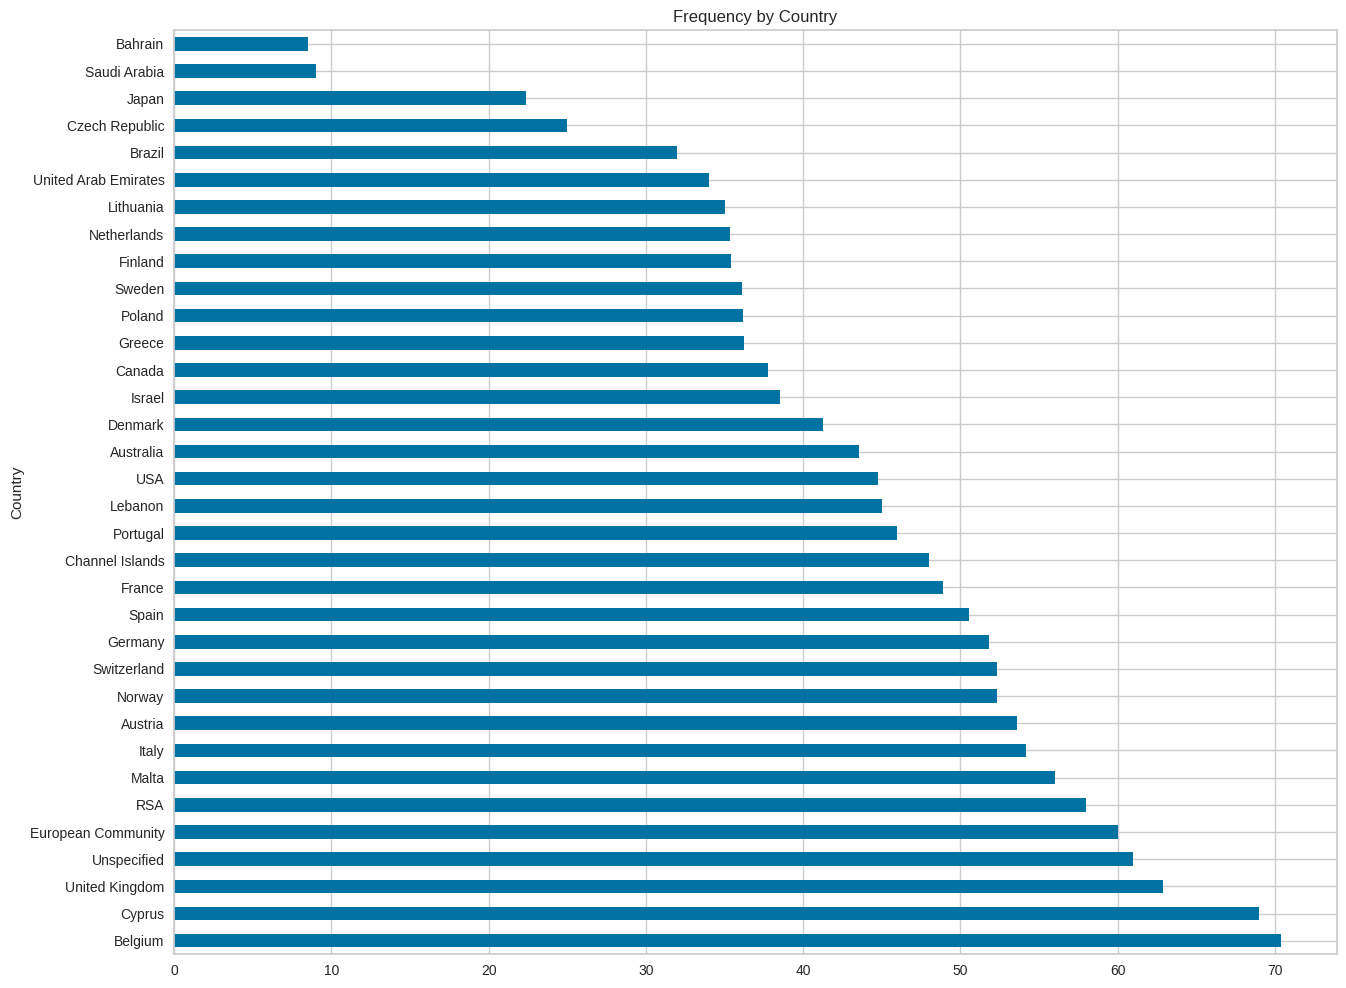

In [57]:
#group by frequency
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.title("Frequency by Country")
plt.show()

On an Average, customers in Belgium shop most frequently

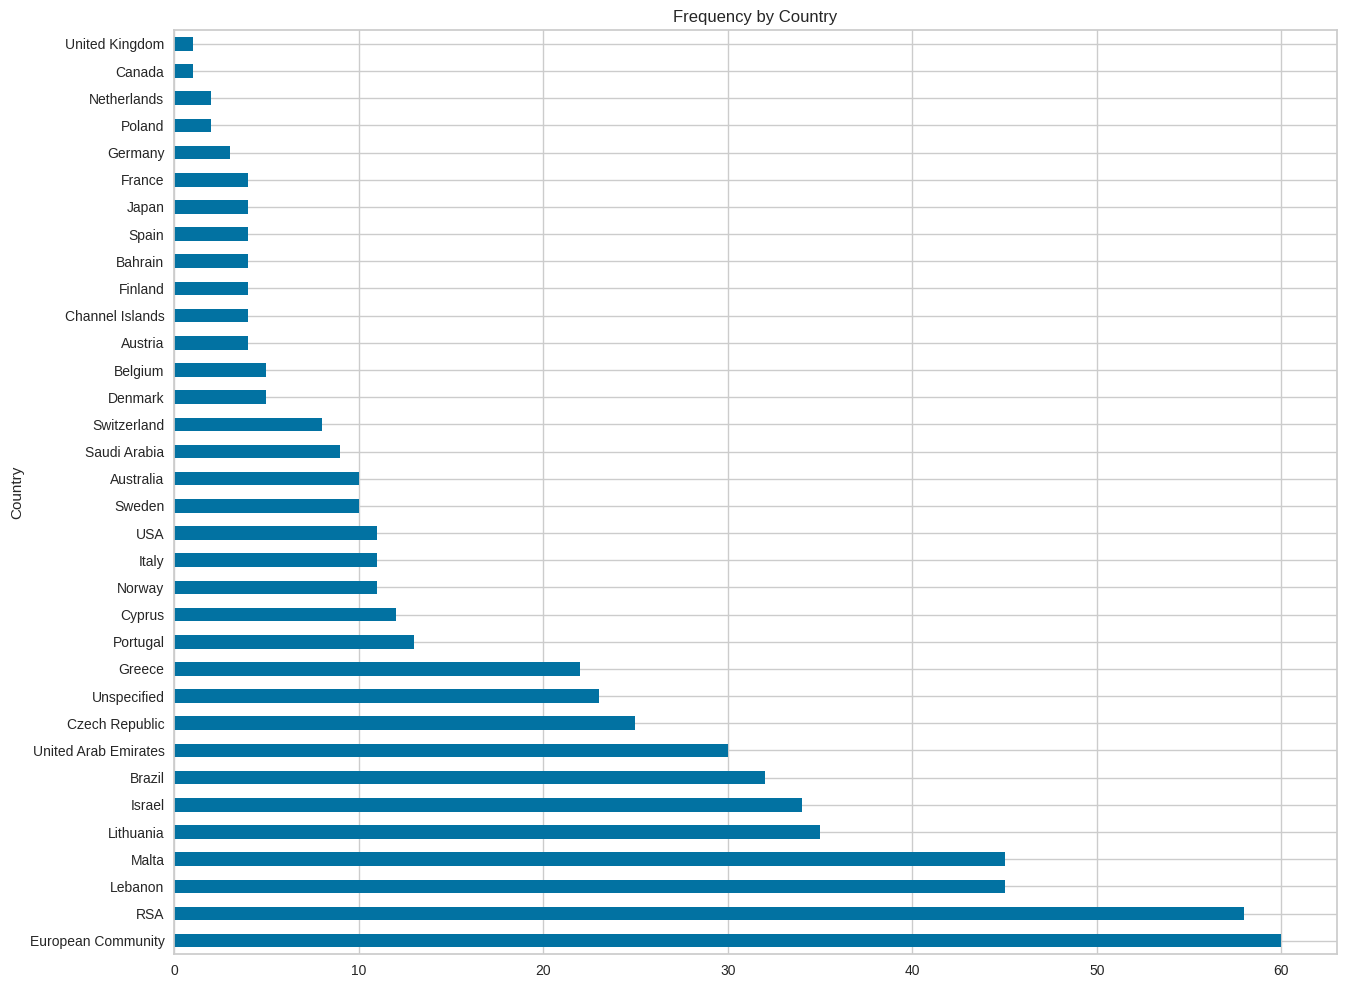

In [58]:
#groupby last transaction
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.min().sort_values(ascending=False).plot.barh()
plt.title("Frequency by Country")
plt.show()


On average, Customers in Lithuania shop the most recently

####Heatmap

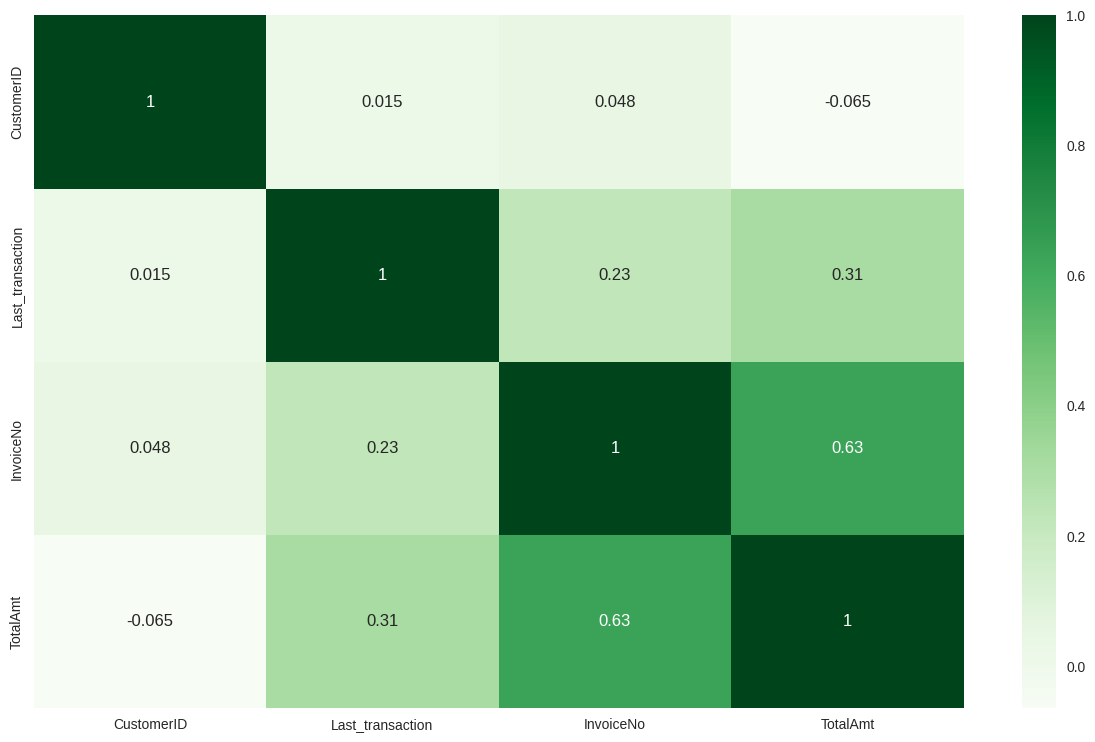

In [62]:
plt.figure(figsize=(15,9))
# Select only numerical features for correlation calculation
numerical_features = new1_df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), cmap="Greens", annot=True)
plt.show()

###Scaling numeric data

The scaling is used for making data points generalized so that the distance between them will be lower.

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.

Normalization scales each input variable separately to the range 0-1
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one..

I will normalize the data in this sample

In [67]:
new2_df=new1_df[['Last_transaction','InvoiceNo','TotalAmt']]
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df,columns=new2_df.columns)
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,TotalAmt,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


##III. Clustering methods

####1. K-Means clusters:Elbow Method

## III. CLUSTERING METHODS:
## 1. K-means Clusters: Elbow Method

It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.


1) Select the number of clusters for the dataset ( K )


2) Select K number of centroids


3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups


4) Now find the original centroid in each group


5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is **Elbow Method**.

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ).

As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

The K value corresponding to this point is the optimal K value or an optimal number of clusters.


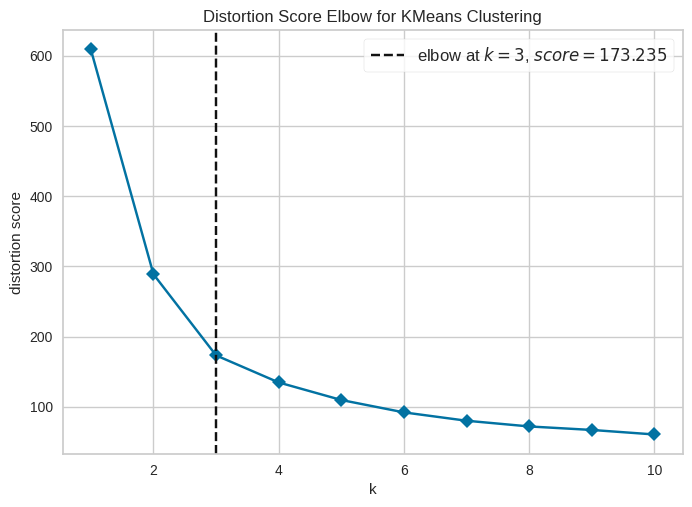

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
k_mean_df=scaled_df.drop(columns=['Country'],axis=1)
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,11),timings=False)# timings to Display the fitting time per k to evaluate the amount of time required to train the clustering model.
#by default metric is distortion
visualizer.fit(k_mean_df)
visualizer.show()

Elbow method helps us decide the clusters for our data are 3. Next step I want to visualize the data by clusters

2.K-Mean clusters Silhouette method

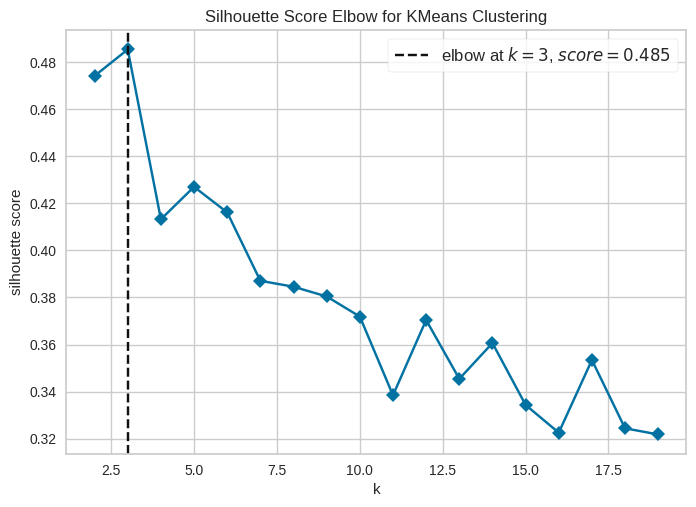

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
visualizer2=KElbowVisualizer(model,k=(2,20),metric='silhouette',timings=False)
visualizer2.fit(k_mean_df)
visualizer2.show()

Number of clusters created by Sihouette Method are 3. Now we will plot the clusters to see how the data distributed.

In [73]:
#add no.of cols column in dataframe
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(k_mean_df)
k_mean_df['clusters']=y_pred
k_mean_df

,Last_transaction,InvoiceNo,TotalAmt,clusters
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,1
2,0.828418,0.016512,0.090092,0
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,0
...,...,...,...,...
3918,0.742627,0.009288,0.048656,0
3919,0.482574,0.006192,0.021774,1
3920,0.335121,0.011352,0.047969,1
3921,0.900804,0.779154,0.564388,2


In [74]:
# Cluster centroid:
km.cluster_centers_

array([[0.77650143, 0.04289748, 0.15789485],
       [0.22058455, 0.04002649, 0.14850462],
       [0.79802009, 0.15828192, 0.63429608]])

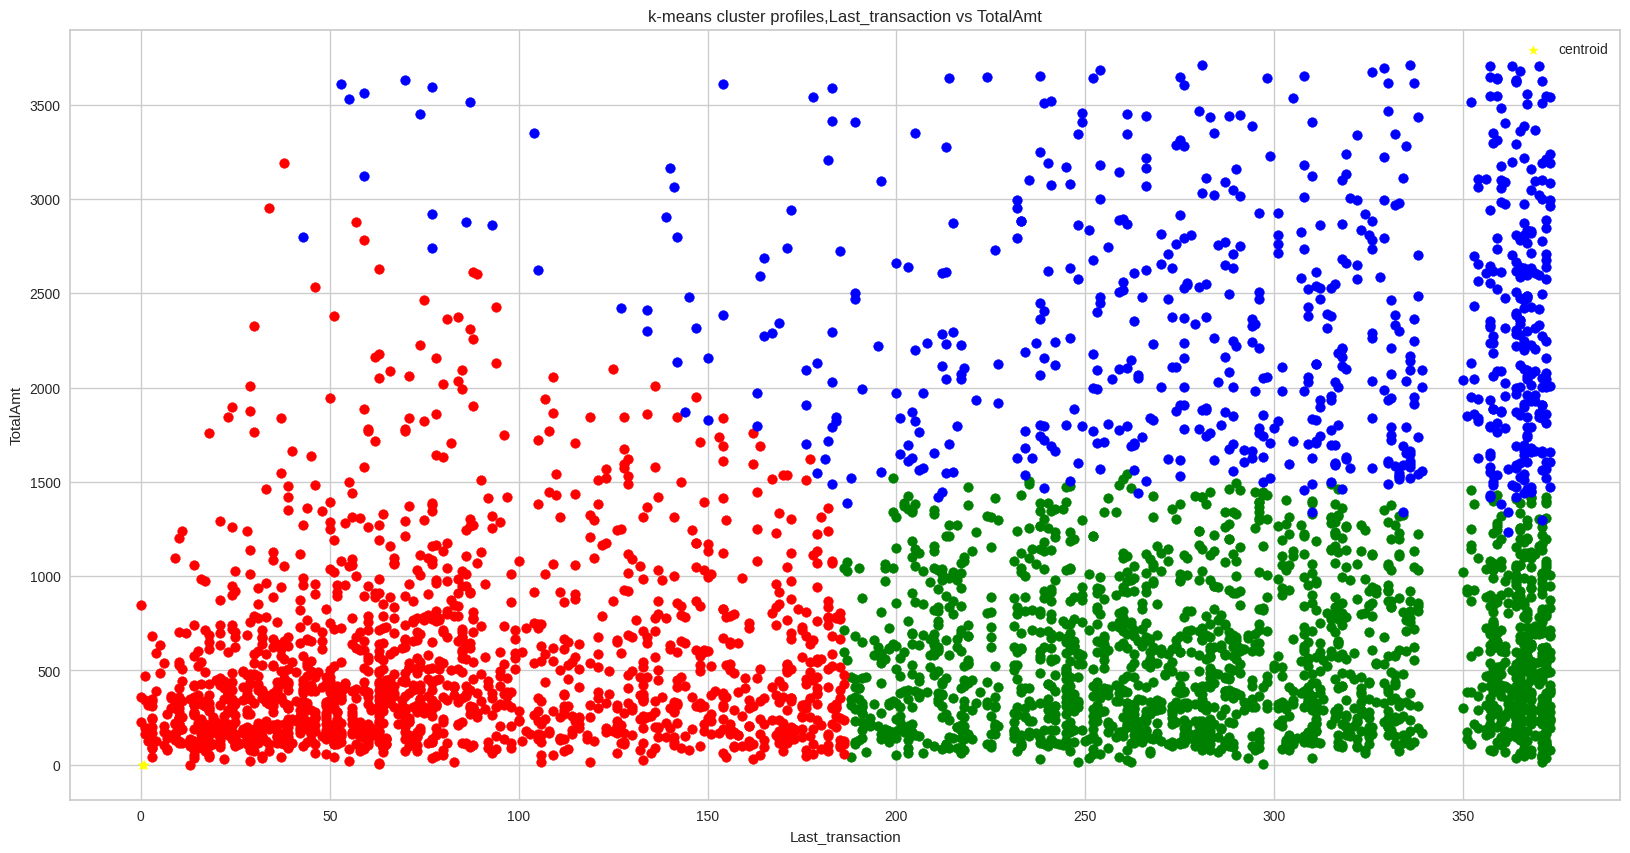

In [77]:
#visualize clusters with original data
new2_df['clusters']=y_pred
df1=new2_df[new2_df.clusters==0]
df2=new2_df[new2_df.clusters==1]
df3=new2_df[new2_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1.TotalAmt,color='green')
plt.scatter(df2.Last_transaction,df2.TotalAmt,color='red')
plt.scatter(df3.Last_transaction,df3.TotalAmt,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmt')
plt.title("k-means cluster profiles,Last_transaction vs TotalAmt")
plt.show()

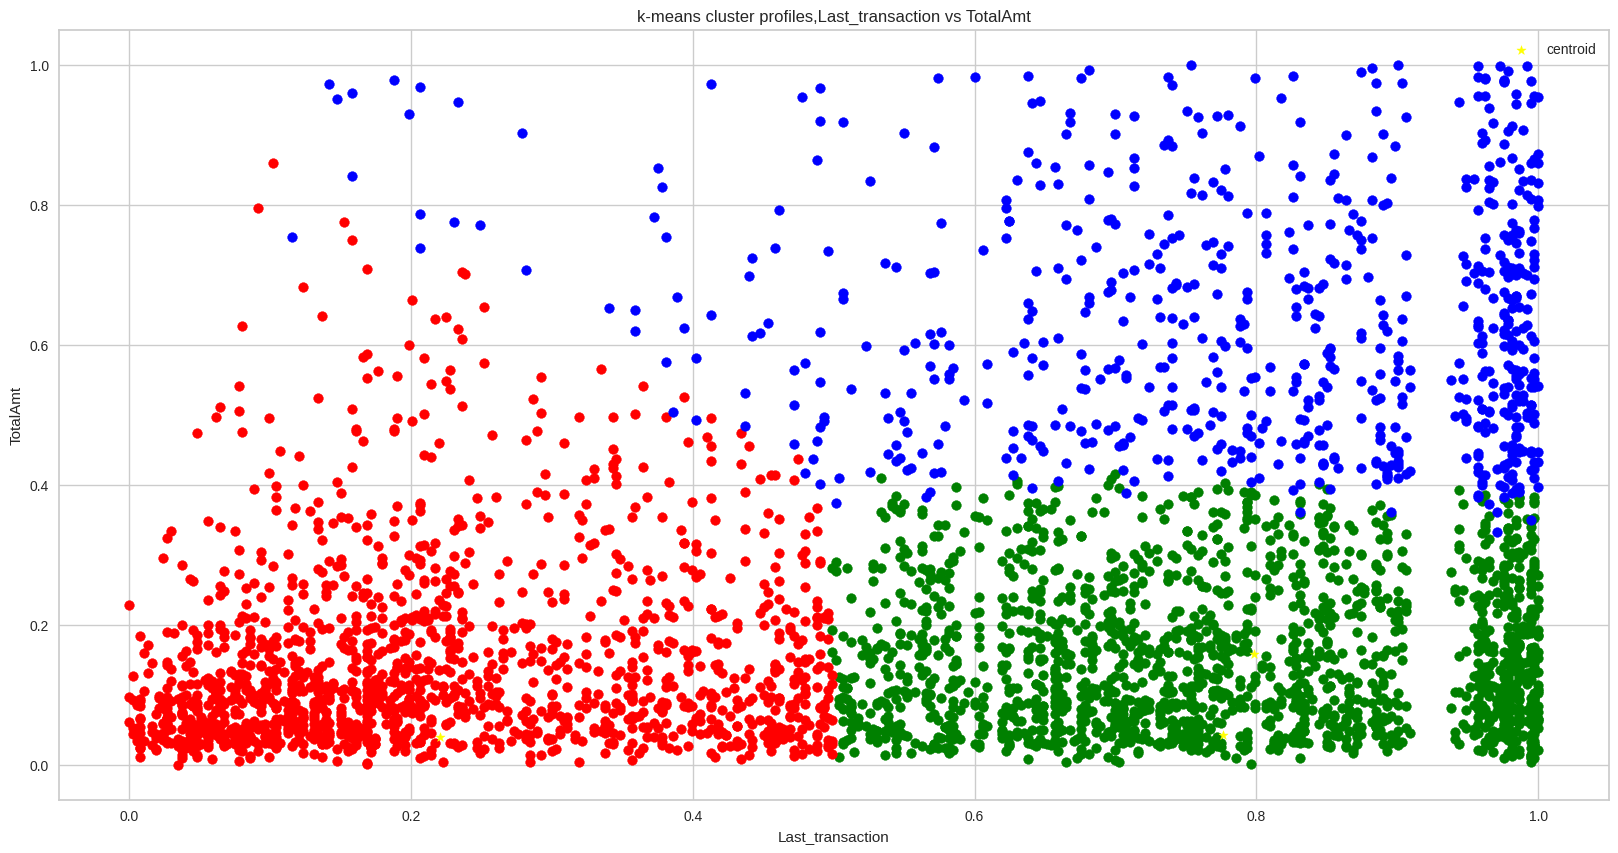

In [78]:
#visualize with scaled data
df1=k_mean_df[k_mean_df.clusters==0]
df2=k_mean_df[k_mean_df.clusters==1]
df3=k_mean_df[k_mean_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1.TotalAmt,color='green')
plt.scatter(df2.Last_transaction,df2.TotalAmt,color='red')
plt.scatter(df3.Last_transaction,df3.TotalAmt,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmt')
plt.title("k-means cluster profiles,Last_transaction vs TotalAmt")
plt.show()

The K-Means model segments the data into distinct clusters based on customer's Recency(Last_transaction) and Monetary(TotalAmount).

Cluster 0 consists of customers with the last_transaction between 0 and 180 days, and total amount spent between 0 to $2500;

Cluster 1 consist of customers with the last_transaction between 180 and 400 days, and total amount spent between 0 and $1500;

Cluster 2 consits of custoemrs with the last_transaction between 50 and 400 days, and total amount spent between 1500 and 3500.

Text(0.5, 1.0, 'K Means')

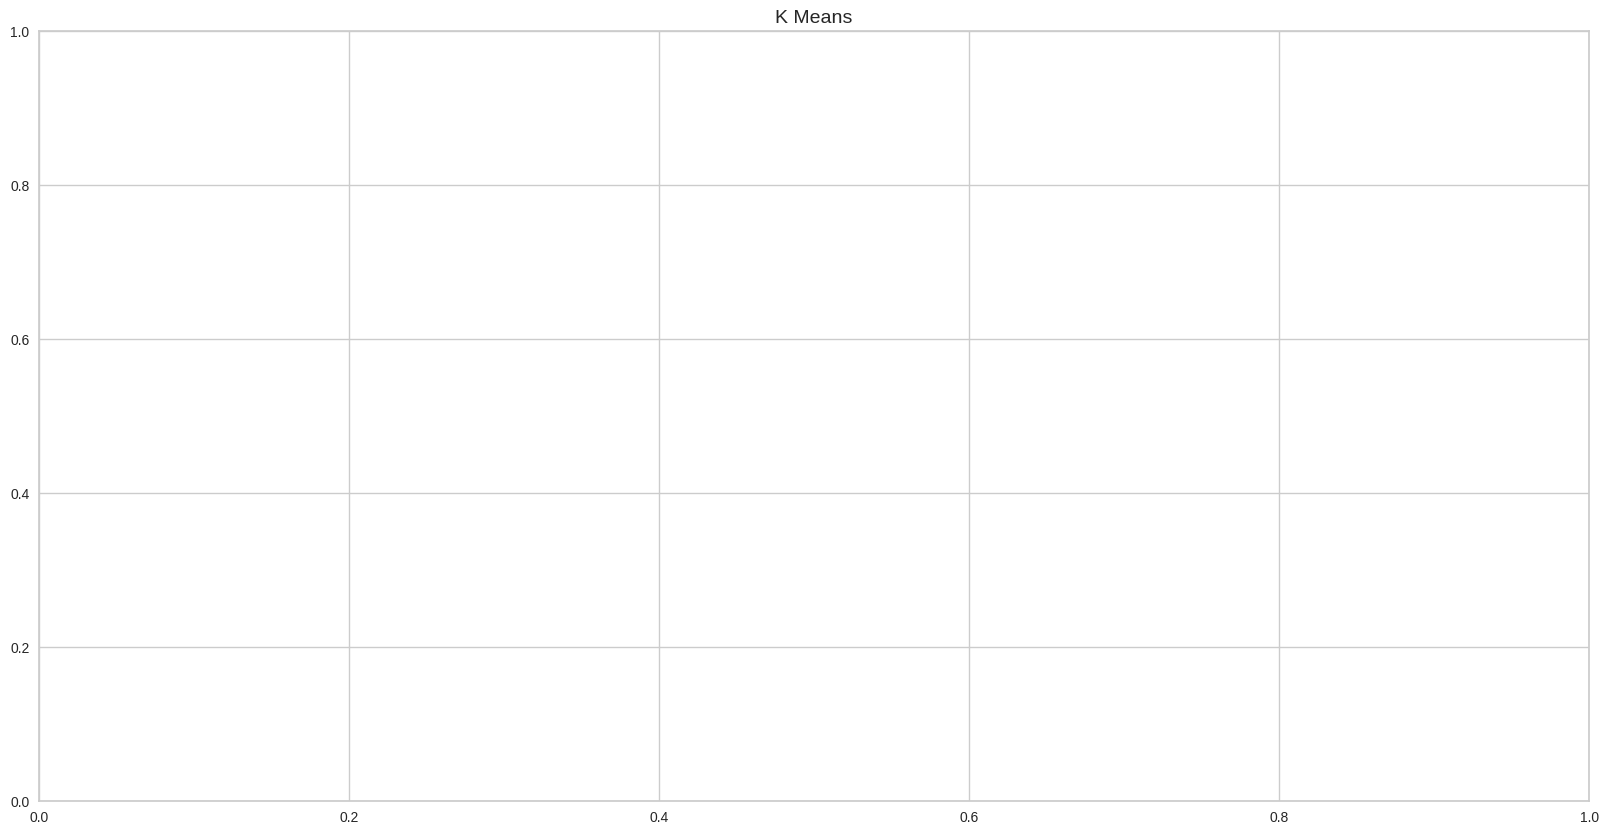

In [93]:
#KMeans Clusters with 3 Clusters
km = KMeans(n_clusters=3)
km.fit(k_mean_df)
km.predict(k_mean_df)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(k_mean_df['Last_transaction'],
           k_mean_df['InvoiceNo'],
           k_mean_df['TotalAmt'],
          c=labels.astype(float),
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("K Means", fontsize=14)

In [94]:

# Create 3D Scatter Plot with cluster labels as color
fig = px.scatter_3d(k_mean_df,
                     x='Last_transaction',
                     y='InvoiceNo',
                     z='TotalAmt',
                     color=labels.astype(str),  # Convert labels to string for discrete coloring
                     opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'K Means')

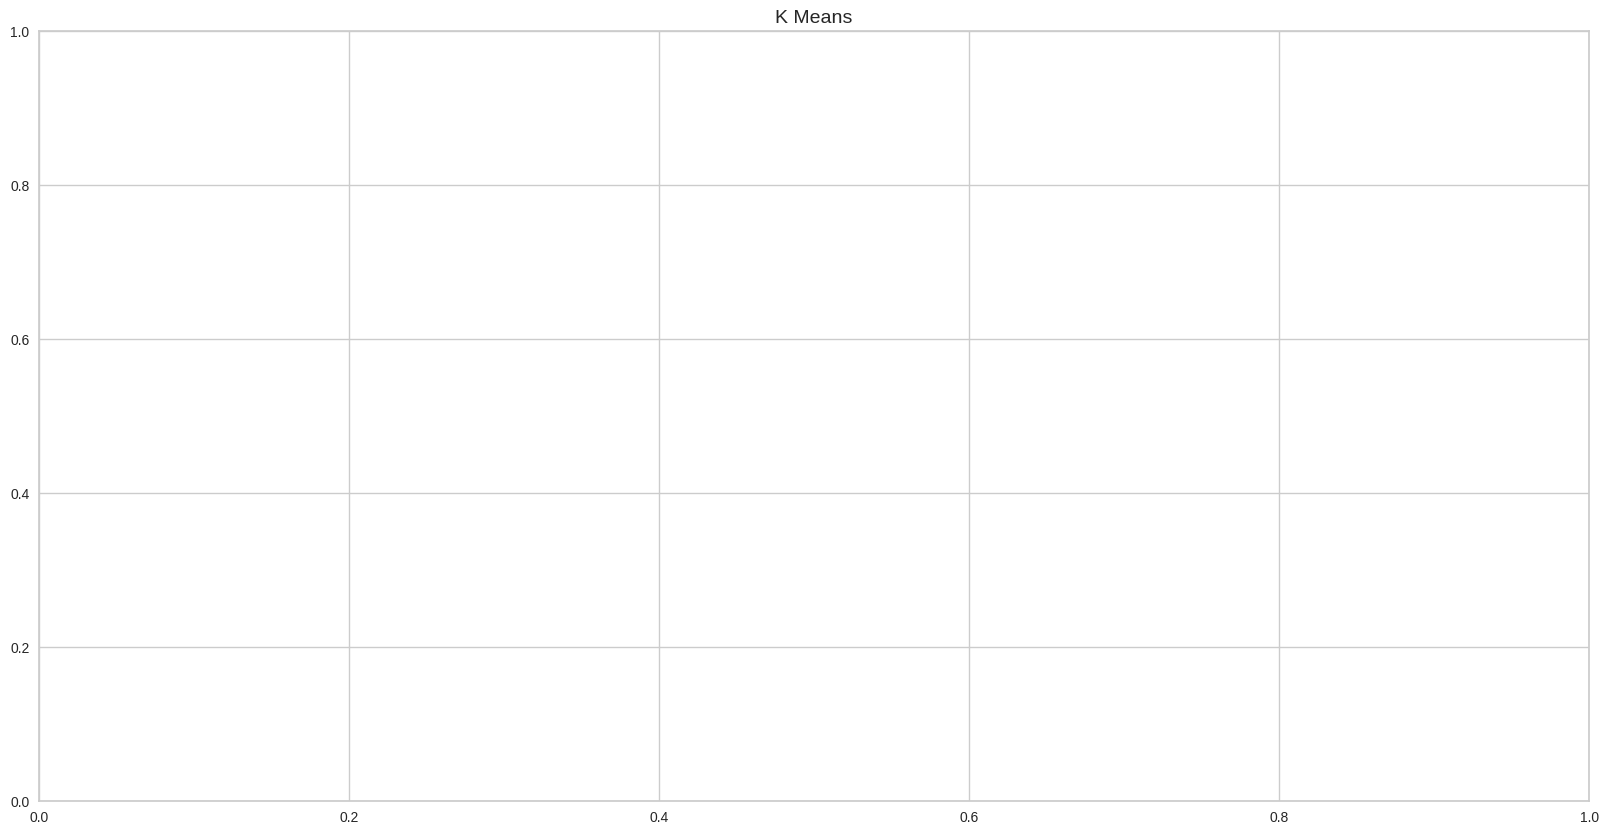

In [95]:
#KMeans Clusters with 2 Clusters
km = KMeans(n_clusters=2)
km.fit(k_mean_df)
km.predict(k_mean_df)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(k_mean_df['Last_transaction'],
           k_mean_df['InvoiceNo'],
           k_mean_df['TotalAmt'],
          c=labels.astype(float),
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("K Means", fontsize=14)

In [96]:
import plotly.express as px

# Use cluster labels for color
fig = px.scatter_3d(k_mean_df,
                     x='Last_transaction',
                     y='InvoiceNo',
                     z='TotalAmt',
                     color=km.labels_.astype(str),  # Convert labels to string for discrete coloring
                     opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


Text(0.5, 1.0, 'Gaussian Mixture Model')

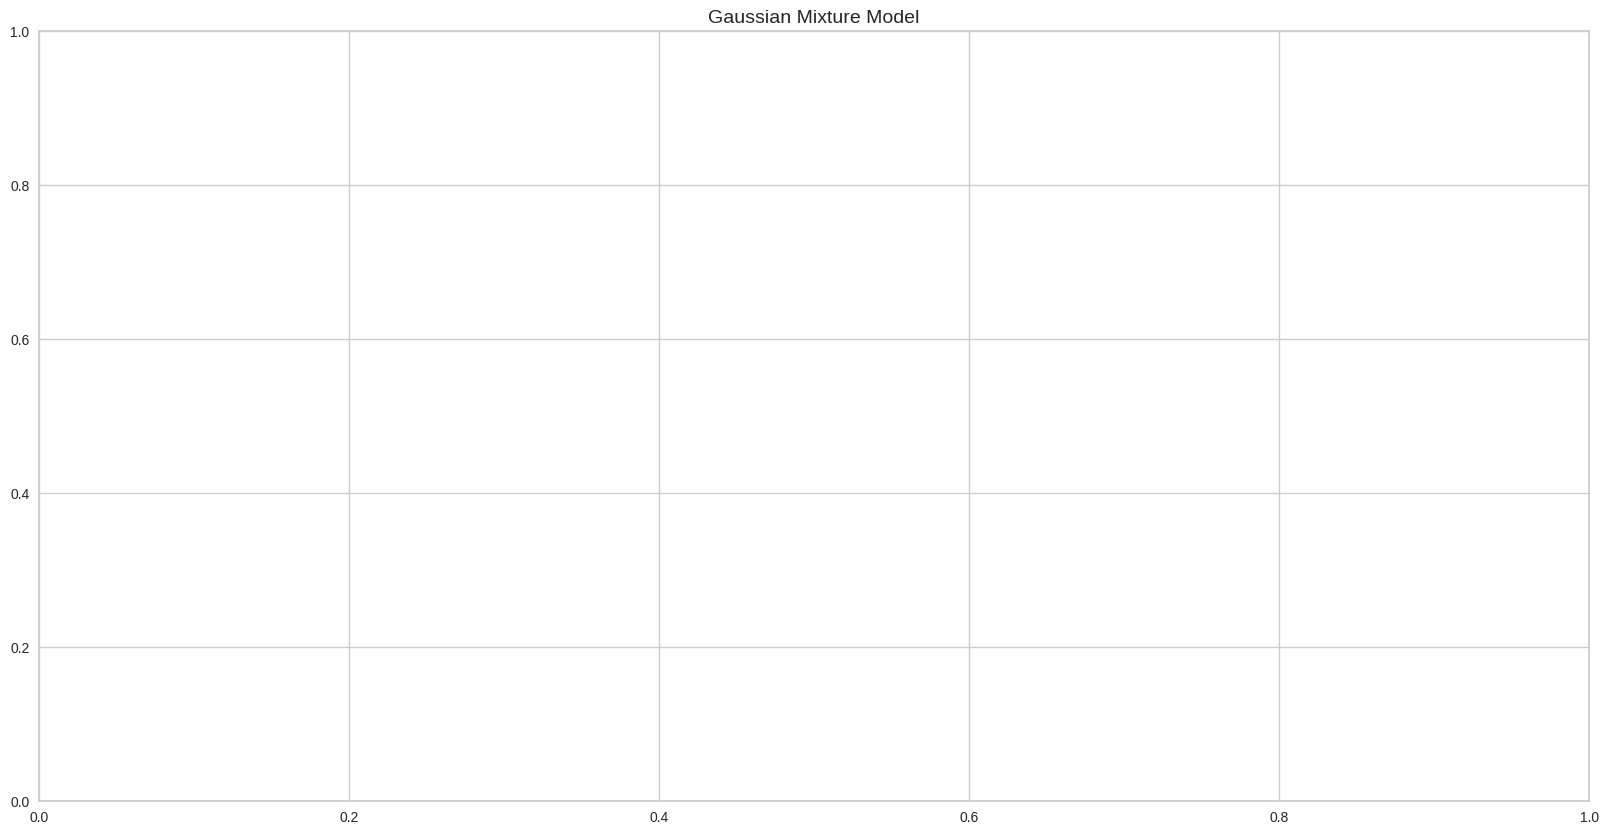

In [98]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(k_mean_df)
proba_lists = gmm.predict_proba(k_mean_df)
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(k_mean_df['Last_transaction'],
           k_mean_df['InvoiceNo'],
           k_mean_df['TotalAmt'],
          c=colored_tuples, edgecolor="k", s=100)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("Gaussian Mixture Model", fontsize=14)

In [99]:
import plotly.express as px
import numpy as np
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(k_mean_df)
proba_lists = gmm.predict_proba(k_mean_df)  # Probabilities for each cluster

# Convert probabilities to RGB colors
def proba_to_color(proba):
    """Convert probability distributions to RGB colors."""
    return f"rgb({int(proba[0]*255)}, {int(proba[1]*255)}, {int(proba[2]*255)})"

colors = [proba_to_color(p) for p in proba_lists]

# Create 3D Scatter Plot
fig = px.scatter_3d(k_mean_df,
                     x='Last_transaction',
                     y='InvoiceNo',
                     z='TotalAmt',
                     color=colors,  # Use probabilities as colors
                     opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
